# Big Data Processes Exercises - Week 03
# <font color= pink>  Classification </font>



#### What we will cover today

<ol>
    <li>Importing packages and libraries</li>
    <li>Loading and examining the dataset</li>
    <li>Pearson correlation matrix</li>
    <ol>
        <li>Heatmap</li>
        <li>Feature Selection</li>
    </ol>
    <li>Decision trees</li>
    <ol>
        <li>Splitting the dataset into test and train</li>
        <li>Building the Classifier Tree Model</li>
        <li>Evaluating the model</li>
        <li>Optimising the model - Pruning</li>
    </ol>
    <li>Visualising the Classification Tree Model</li>
    <ol>
        <li>Visualising with graphviz</li>
        <li>Visualising with sklearn</li>
    </ol>
    <li>K-NN</li>
    <ol>
        <li>Scaling - Standardisation</li>
         <li>k-NN modelling</li>
        <li>k-fold cross validation</li>
        <li>k-NN modelling with optimal number k</li>
    </ol>
</ol>

***
***
***

## 1. Importing various packages and libraries</font>

First, we import some libraries. We rely on the usual pandas and numpy packages, moreover, in order to create models, we are going to use the Sklearn and Matplotlib. 

Sklearn is a package with a set of Python modules for machine learning and data mining.

Matplotlib is used to display our results.

**Note:**
There are two ways to import a library: either import the whole package by **import library_name**, but it may take time. If you know exactly what part (class) of the package you need, you can directly specify it by using the **from *library_name* import *class_name***

If you have problems importing a certain library or package, remember to install with pip either here directly in the notebook or through your terminal

- pip3 install < LIBRARY NAME >
- %pip install < LIBRARY NAME >

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### IBM-HR-Employee Attrition dataset ###

Today, we are gonna work with the **IBM-HR-Employee dataset**. This dataset describes and includes IMB's (FAKE) employees; their age, monthly income, year working in the company, education, job role, etc, you name it! 

You can find the dataset at: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset. There is a datacard explaining the different columns and values, notebooks working with the dataset and discussions.

We will use this dataset from now on and until week 7. We will focus on <font color=red>*attrition* </font>: has an employee left the company or not?

- Attrition, def.:
*"A gradual reduction in personnel or membership because of resignation, retirement, or death, often viewed in contrast to reduction from layoffs."*

Aka, we will be making models that can predict whether a specific employee will leave the company. 

As such, we will use the dataset to perform **supervised machine learning** with the goal of creating **classification models**. Our **target variable**/**dependent variable** is attrition, a **categorical variable** with two possible categories: 0 (signifying False, i.e., the employee has not left the company) and 1 (signifying True, i.e., the employee has left the company). More on this shortly!

***
***

## 2. Loading and examining the dataset

In [2]:
df = pd.read_csv('IBM-Employee-Attrition.csv', delimiter=',')
df

Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently        884  Research & Development   
1466   39          0      Travel_Rarely        613  Research & Development   
1467   27          0      Travel_Rarely        155  Research & Development   
1468   49          0  Travel_Frequently       1023                   Sales   
1469   34          0      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2        

As we explained above, our target variable, attrition, can either be 0 or 1:
- 0 = No attrition, the employee did not leave the company
- 1 = Attrition, the employee left the company

### **<font color= turquoise>EXERCISE 1</font>**
Spend a few minutes on familiarizing yourself with the dataset. As a minimum, you should be able to explain which variables it contains, their data type, and what a row in the dataset represents.

For this, you can use some of the methods for dataset exploration, that you learned in the two previous notebooks!

In [ ]:
# Insert your code for exploring the dataset in this code cell here

***
***

## 3. Pearson correlation matrix

In order to build any model we must specify a **target variable/dependent variable** and one or more **feature variables/independent variables**.

- **(X)** = feature or independent variable
- **(y)** = target or dependent variable - in this case, 'Attrition'

In order to figure out what variables to choose as feature(s), aka, which variables we will use to tr to predict our target, we create a **correlation matrix**. 

The correlation matrix we will create visualizes the **pearson correlation** between the variables in the dataset. Other correlation methods include: 
- Spearman 
- Kendall 
- Gamma 
- Eta 
- **You can look up the different correlation types and how they differ on the internet**

In [ ]:
# `corr`: The computed correlation matrix
# Method = pearson
# Numeric values only. A correlation cannot take into account qualitative data unless they are transformed. More on that in week 7
corr = df.corr(method='pearson', numeric_only=True)
corr

### 3.1 Heatmap

We have constructed a pearson correlation matrix, however for better readability we will create a **heatmap** based on our correlation matrix. A heatmap is basically a graphical representation of the data that uses color coding to represent different values. 


Here we use the library Seaborn which we defined as 'sns'.

In [ ]:
# We create a new figure (fig) and axis (ax) with a specified size.
fig, ax = plt.subplots(figsize=(30,30)) # Adjust the figsize values to change the size of each cell in the heatmap.

# - `xticklabels` & `yticklabels`: Use the columns of the correlation matrix for labeling the x and y axis respectively.
#   blue represents positive correlations and red represents negative correlations.
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5, ax=ax)

The Pearson correlation coefficient measures the linear relationship between two variables.
Its value ranges from -1 to 1, where:
- **1** implies a perfect **positive linear relationship**. If one variable increases, the other variable increases as well
- **-1** implies a perfect **negative linear relationship**. When one variable increases, the other variables decreases
- **0** implies **no relationship** between the variables

**TL;DR:** The darker the colour, the more correlated the variables are. 

Also note that only numeric values are present! 

### **<font color= turquoise>EXERCISE 2</font>**
Explain why some variables are excluded from the pearson correlation matrix. Insert you explanation in the markup cell below.

Insert your answer here:

Something strange has happened to EmployeeCount and StandardHours. Explore the columns and try and figure as to maybe why they are NaN in the correlation matrix.

In [ ]:
df['EmployeeCount']
df['StandardHours']

Insert your answer here:


### 3.2 Scatter plot

Another way to look for correlation is by plotting all the data. OBS! Since we are working with so many variables, expect that it will run for a couple of minutes before there will be any output.

In [ ]:
#from seaborn library
#plots all the correlations in scatter plot
sns.pairplot(data=df) 

# To look more closely at the grid of scatterplots below, hover your mouse in the right corner of the image and click on the middle option ("Expand image").

Note! Using a scatterplot can be a bad idea in classification. We want to predict Attrition or not. Yes or No. 0 or 1. Scatter plots are great for continuous values, though - e.g., look at the correlation between 'Age' and 'TotalWorkingYears' or 'MonthlyIncome' and 'TotalWorkingYears'. What does these scatterplots tell us?

Again, to look more closely at the grid of scatterplots below, hover your mouse in the right corner of the image and click on the middle option ("Expand image"). This will open a new tab with the grid for you to explore.

### 3.3 Feature Selection

After you've seen the correlation between the some of the variables, which variable would you choose as the feature(s) in order to predict our target (Attrition)? Feel free to play around with different features and the number of features.

Now we will declare our feature and target vectors.

Remember, to make a classificaton model, we need to select:
- A target/dependent variable, in our case we choose 'Attrition'
- One or more features/independent variables. We choose the variables that we suspect to be correlated with whether an employee decides to leave the company or not. For instance, we have chosen the feature 'JobSatisfaction' because we think an employee's job satisfaction may play a role in whether they decide to leave IBM.

In [3]:
# Below, we make a list of features/independent variables 'X', and specify our target/dependent variable, y
# The model will guess/predict the 'y' feature (our target) based on the list of features, 'X'
# Running the cell will not produce any output. This is because we are defining X and y, which we will be using in the next section to train our model

X = df[['EnvironmentSatisfaction', 'JobSatisfaction', 'JobInvolvement', 'YearsAtCompany', 'StockOptionLevel', 'YearsWithCurrManager', 'Age', 'MonthlyIncome', 'YearsInCurrentRole', 'JobLevel', 'TotalWorkingYears']].values

y = df['Attrition'].values


### **<font color= turquoise>EXERCISE 3</font>**

Take a look at X and y. What do you think is stored in each of these variables?

Hint: X represents the independent variable(s)/feature(s) and y represents the dependent variable/target variable...

In [ ]:
X

In [ ]:
y

Insert your answer here:

***
***

## 4. Decision Trees

If you have any problems with understanding the Classifier Decision Tree, we highly recommend watching some videos on youtube. StatQuest is always a favourite <3

https://youtu.be/_L39rN6gz7Y?si=OSB_Y0D0rQbl2Enz

![image.png](https://miro.medium.com/max/1275/0*0dN6d8THyImxwPeD.png)

### 4.1 Splitting the dataset into "train" and "test"

In order to train our Decision Tree Classifier model and evaluate it afterwards, we need to split our data into two new datasets: a training sample and a test sample. We train our model on our the training dataset and when the model is ready, we test it's <font color = pink><b>prediction accuracy</b></font> using the test dataset.

- X_train and y_train will be used for training the model
- X_test and y_test will be used for evaluating the model's performance
- 80% of the data will be used for training, and 20% for testing. You can also split it 70:30, as long as each set is representative of the overall distribution.
- Random_state shuffles the data before the split. We set it to 0 to ensure reproducibility (in other words, everytime this code is run we get the same split. This ensures consistet results accross runs. In other wwords, when you run the code, you get the same split as when we (the TAs) ran the code)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

An important issue might arise knowing that the vectors, both target and feature are ordered. Therefore, if we split them into train and test datasets, what guarantees that both sets will include all labels and all type of feature vectors? **Luckily the train_test_split() method takes care of this by random shuffling the data before applying this split.**

### **<font color = turquoise >EXERCISE 4</font>**

How does the X_train look?
Can you explain what is stored in here?

In [ ]:
X_train

Insert your answer here: 

### 4.2 Building the Classification Decision Tree

We use the 'sklearn' package to build our Classification Tree model. The Sklearn default implementation uses Gini impurity to split on the given attributes. It can be easily transformed by changing the **criterion** parameter from **gini** to **entropy**, if you want to use information gain as a splitting criteria. Read the documentation for more insight. 
    
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

First we create an object of the DecisionTreeClassifier() class. We name it 'clf', but you can name it anything you like.

Here **max_depth** refers to the maximum number of levels of the tree, excluding the topmost node. 

The default value is None, meaning that it will continue splitting until all nodes are leaf nodes. 

We are limiting the **max_depth** to prevent it from overfitting.

Later, when we will optimise the tree, we will explore the different depths!

In [6]:
clf = DecisionTreeClassifier()

Here, we apply the .fit() method to the training data. In other words, we train our model using the training data:

In [7]:
clf = clf.fit(X_train, y_train)

After having trained our model, we **make predictions** using the features the (new/unseen) **test** dataset.

More specifically, we ask Python to take our newly trained classification model and apply it to our test dataset. 
What is happening under the hood is that we are "feeding" the model with features/independent variables and asking it to "spit out" a prediction for each row (= employee) in the test dataset. The model will look at the features and make a decision for each row/employee, giving us its best "guess" on whether this employee will leave the company or stay.

The result (y_pred) contains the models "guess"/classification of each row in the test data. Remember, our target/dependent variable was 'Attrition' (whether an employee had left the company or not) and this variable could be either 0 (= employee has not left) or 1 (= employee has left).

In [8]:
y_pred = clf.predict(X_test)


### **<font color= turquoise>EXERCISE 5</font>**

In your own words, explain what is stored in y_pred.

In [ ]:
y_pred

Insert your answer here: 

### 4.3 Evaluating the model

Now, we want to assess how good our model was at guessing whether an employee will leave IBM.

To assess this, we compare the predicted values of our target variable, which the model gave us above ('y_pred') with the actual values ('y_test'). What Python does it to compare y_pred and y_test and see how many times our model was right.

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Our classification decision tree's accuracy is ~0.75 = 75%. In other words, our model was able to predict the target (attrition) correctly 75% of the time.

Let's take a closer look at it's predictions using what we call a 'confusion matrix' (more on this in week 5):

In [ ]:
# All your burning questions about the confusion matrix will have to wait until week 5:)) 
# We use it here to illustrate the number of correct and incorrect predictions
mtr = confusion_matrix(y_test, y_pred)

print("Correct predictions:", (mtr[0,0] + mtr[1,1]))
print("Incorrect predictions:", (mtr[0,1] + mtr[1,0]))
print("Total predictions:", (mtr.sum()))

### 4.4 Optimising the model - Pruning

We will re-do the steps 4.2 and 4.3 with some tweaks. Remember! We don't have split our dataset into test and train, since we have already done this earlier.

We change:
- The selection measure in our Decision Tree to 'entropy' (information gain). When declaring your tree object, Gini index is the standard/default (aka., you don't have to write criterion="gini" in the parenthesis)
- The max depth. Remember!
  - High max depth = overfitting
  - Low max depth = underfitting


We change these elements be cause we are trying to optimize our model (make it even better at predicting employee attrition):

In [11]:
clf_2 = DecisionTreeClassifier(criterion="entropy", max_depth=6)

In [ ]:
clf_2.fit(X_train, y_train)

In [13]:
y_pred_2 = clf_2.predict(X_test)

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_2))

In [ ]:
mtr = confusion_matrix(y_test, y_pred_2)

print("Correct predictions:", (mtr[0,0] + mtr[1,1]))
print("Incorrect predictions:", (mtr[0,1] + mtr[1,0]))
print("Total predictions:", (mtr.sum()))

***
***

## 5. Visualising the Classification Tree Model

PSSST! If you can't install graphviz or get the other packages to work, <font color=red> skip to 5.2 </font>. You can also visualise your decision trees with sklearn.

### 5.1 Visualising with graphviz

In [16]:
#%pip install pygraphviz
#%pip install pydotplus

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image

import graphviz
import pydotplus

#### 5.1.1 Visualising the 1st tree

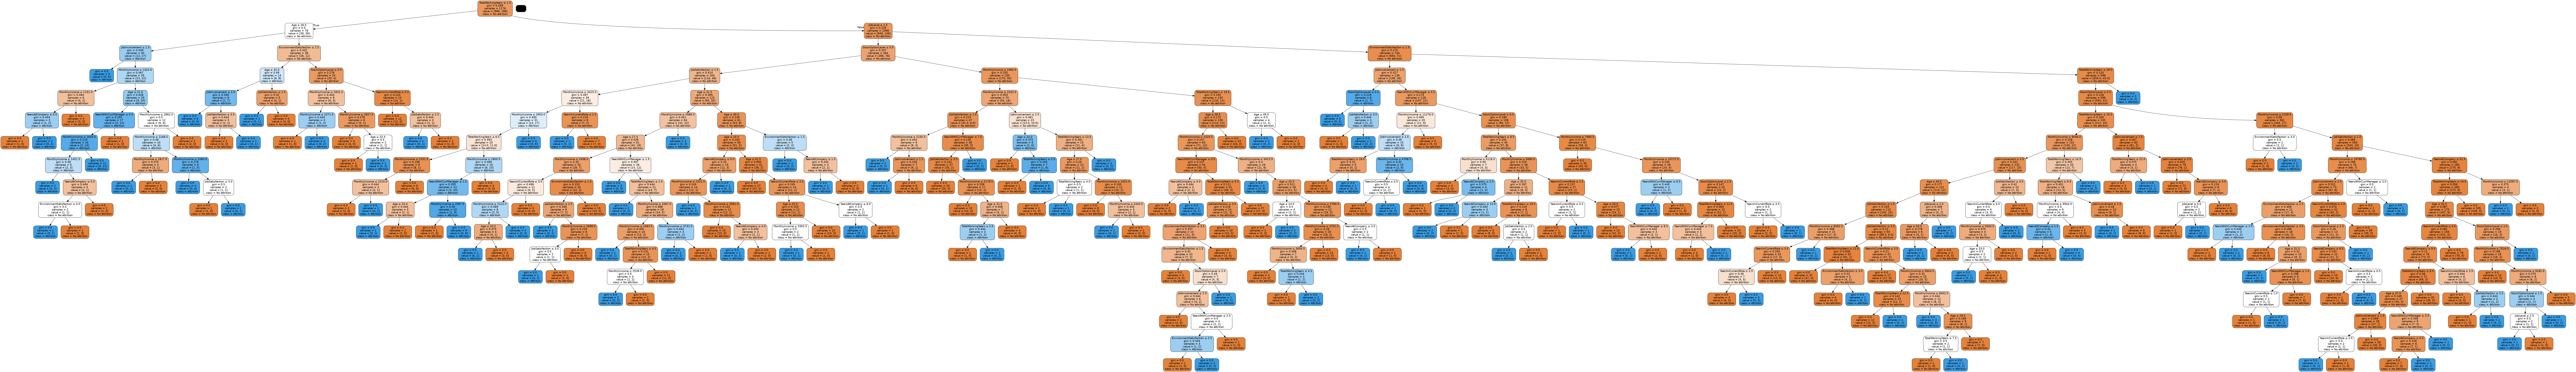

In [17]:
#Creating a list with our features for our visualisation. The number of features in this list has to match with our 'X' in step 3.2!
feature_names = ['EnvironmentSatisfaction', 'JobSatisfaction', 'JobInvolvement', 'YearsAtCompany', 'StockOptionLevel', 'YearsWithCurrManager', 'Age', 'MonthlyIncome', 'YearsInCurrentRole', 'JobLevel', 'TotalWorkingYears']

#Creating a StringIO object called dot_data to hold the text representation of the decision tree.
dot_data = StringIO()

export_graphviz(clf, out_file = dot_data,  
                filled = True, rounded = True,
                special_characters = True, feature_names = feature_names, class_names=['No attrition','Attrition'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Saving the tree as .png
graph.write_png('Attrition.png')
Image(graph.create_png())

#### 5.1.2 Visualising the 2nd (optimised) tree

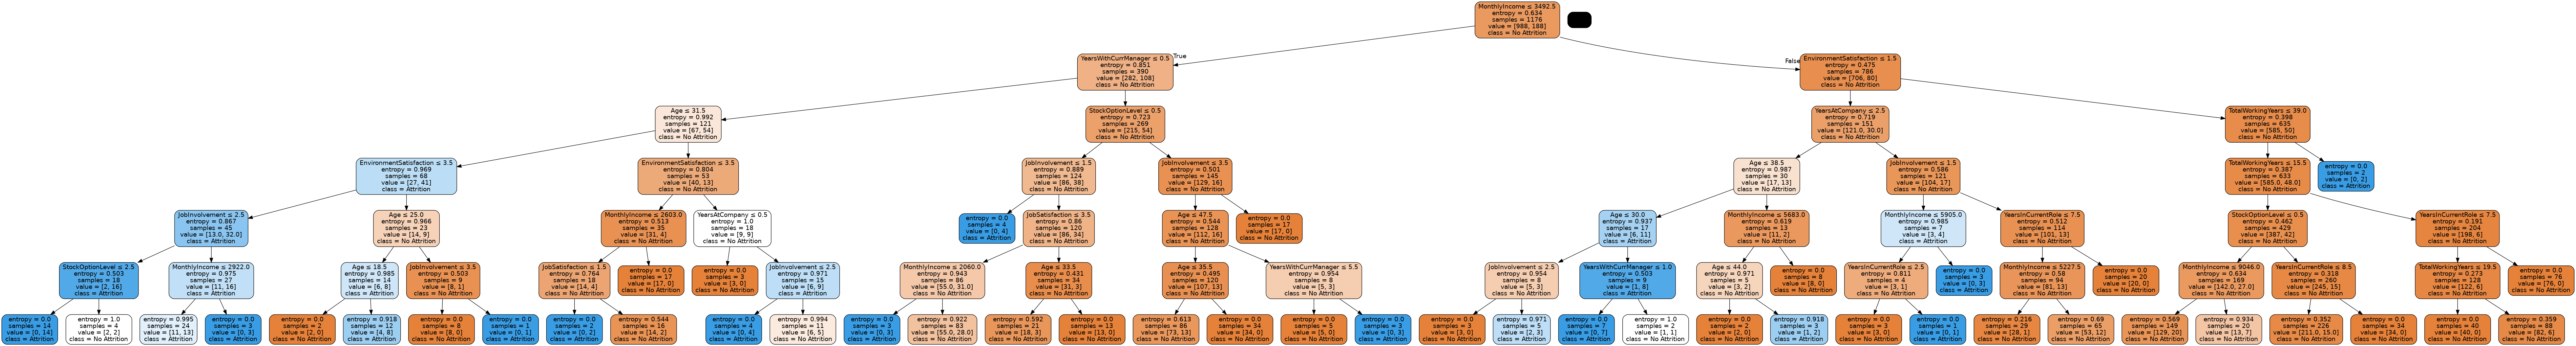

In [18]:
#Creating a list with our features for our visualisation. 
feature_names = ['EnvironmentSatisfaction', 'JobSatisfaction', 'JobInvolvement', 'YearsAtCompany', 'StockOptionLevel', 'YearsWithCurrManager', 'Age', 'MonthlyIncome', 'YearsInCurrentRole', 'JobLevel', 'TotalWorkingYears']

#Creating a StringIO object called dot_data to hold the text representation of the decision tree.
dot_data = StringIO()

export_graphviz(clf_2, out_file = dot_data,  
                filled = True, rounded = True,
                special_characters = True,feature_names = feature_names, class_names=['No Attrition','Attrition'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Saving the tree as .png
graph.write_png('Attrition2.png')
Image(graph.create_png())

### 5.2 Visualising with Sklearn

Here is an easier way to visualise the Decision Trees with sklearn, however the quality and node information is lacking:((

Visualisation is not that important in your modelling, however it can give you a better overview and understanding of your model, so don't be frustrated if you can only visualise it with Sklearn:))

#### 5.2.1 Visualising the 1st tree


In [ ]:
from sklearn import tree

feature_names = ['EnvironmentSatisfaction', 'JobSatisfaction', 'JobInvolvement', 'YearsAtCompany', 'StockOptionLevel', 'YearsWithCurrManager', 'Age', 'MonthlyIncome', 'YearsInCurrentRole', 'JobLevel', 'TotalWorkingYears']

tree.plot_tree(clf.fit(X_train, y_train), feature_names=feature_names, class_names=feature_names, filled=True)
plt.show()

#### 5.2.2 Visualising the 2nd (optimised) tree

In [ ]:
feature_names = ['EnvironmentSatisfaction', 'JobSatisfaction', 'JobInvolvement', 'YearsAtCompany', 'StockOptionLevel', 'YearsWithCurrManager', 'Age', 'MonthlyIncome', 'YearsInCurrentRole', 'JobLevel', 'TotalWorkingYears']

tree.plot_tree(clf_2.fit(X_train, y_train), feature_names=feature_names, class_names=feature_names, filled=True)
plt.show()

### **<font color= turquoise >EXERCISE 6</font>**
Take a loser look at the two trees...

What is the difference between them?

Why do you think the 2nd model is the most accurate?


Your answer goes here:

***
***

## 6. K-NN

### K-Nearest Neighbor for Classification

- KNN classifies 'y' based on most probable class, aka. the most common (see picture below).
- One essential decision to make when constructing a KNN classifier is to choose the number of n-neigbours (Ks), since the result/prediction can change based on this!

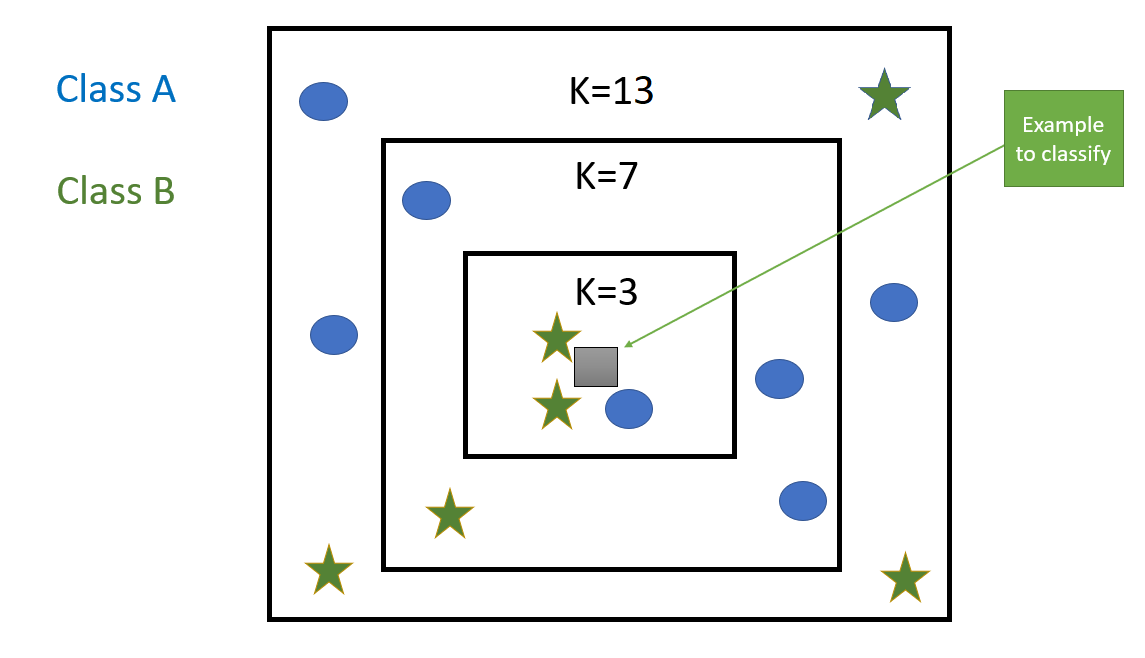

**Question:** With K=3 the KNN algorithm would classify the unknown example as a green star (class B). What would the algorithm classify it as with K=7 and K=13?

### 6.1 Importing necessary packages to make a K-NN classification model

In [ ]:
#kNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

### 6.2 Scaling - standardisation & normalisation

Many machine learning algorithms perform better when numerical input variables are scaled to a standard range - this goes for K-NN. In this section we will only work with standardization. Standardization is a way of adjusting numbers so they're all on the same scale, when training a model.

- **Standardization** rescales a dataset to have a mean of 0 and a standard deviation of 1. 
- **Normalization** rescales a dataset so that each value falls between 0 and 1.

Standardization and normalization are both preprocessing techniques used to scale features in a dataset, but they differ in their purpose, scaling methods, effect on distribution, and robustness to outliers. The choice between standardization and normalization depends on the specific characteristics of the data and the requirements of the machine learning algorithm being used.

Remember! Always scale *after* splitting the dataset into the test and train datasets!


Useful links:
- https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/ 
- https://www.statology.org/standardization-vs-normalization/ 
- https://medium.com/@megha.natarajan/scaling-data-before-or-after-train-test-split-35e9a9a7453f


Below, we standardize our training data set (X_train) using StandardScaler.


In [ ]:
# Creating a standard scaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Transforming the training and test samples using the scaler
X_train_std = scaler.transform(X_train)

# For the curious ones, we don't scale our 'y' - target - since it's only an array with 1s and 0s

Let us see what the standardised data looks like now!

In [ ]:
# before standardization
X_train

In [ ]:
# after standardization
X_train_std

In [ ]:
# We create an object of the k-NN classifier
# The default number of neighbours is 5 
# However, note that is maybe not the most optimal (more on this later)
model_KNN = KNeighborsClassifier()

In [ ]:
# Fit the classifier model to the scaled training data in order to train our model
model_KNN.fit(X_train_std, y_train)

In [ ]:
# We now scale the test data
X_test_std = scaler.transform(X_test)

In [ ]:
# We make predictions on the test dataset 
y_pred_3 = model_KNN.predict(X_test_std)

In [ ]:
# Evaluating the performance of our model on the scaled test data
print("Accuracy: ", accuracy_score(y_test, y_pred_3))

Our accuracy is ~0.83 = 83%. Not great, not terrible.

***
***
***
# Take home messages

After finishing this notebook+exercises, you should know:
- How to make a correlation matrix based a given dataset
- How to select a target variable/dependent variable and one or more independent variables/features
- How to split a dataset into a training and a test dataset
- How to build, train and evaliate a classifier 

Still a bit confused? Take a look at this beginner's guide to Pandas: https://www.w3schools.com/python/pandas/default.asp